In [1]:
import numpy as np  
import matplotlib.pyplot as plt    
from matplotlib.ticker import ScalarFormatter   
from scipy.integrate import odeint

In [2]:
#Fixed parameter values
pi = 1710; 
#beta1 =1.72;
mu =1/(83*365); 
eps =0.33;   #Youngji paper
tau1 = 0.8; tau2 = 0.8; tau =0.8;
psi1 = 0.5; psi = 0.5;
phi1, phi2 = 1/180, 1/180
h1= 0.0045; 
h2 = (1-0.74)*h1;
rho = 1/14; rhot =1/14; rhoh =1/10;
eta1= 0.71; eta2= 0.41; eta4= 0.85; eta3 = 0.46;
sevr_im = 2;  # severity impact is higher than the prevalence impact, people react twice higher than the to prevalence info.
#beta1 = (1.72*(eps+mu)*(mu+rho)*(mu+rho+d1))/(eps*((tau1+tau2)*(mu+rho) +(1-tau1)*psi1*(mu+rho+d1)))


theta = 0.5 # parameter adjusting reduced perception risk (assumed)
delta = 0.8  # proportion of tested people who quarantine/adhere to protective measures (assumed)

#Dtilde, Btilde = 10, 20
D, B = 50, 50
# Fmax = 0.027; F10 = 0.0029; F20 = (0.1)*F10;
# #Tmax = 0.5; T10 = 0.03; T20 = 0.03
# Tmax = 0.1;  T10 = 0.0023; T20 = T10;  #0.022;
a = 1/3  # fixed to be 3 days 
a1 = 0.5
alpha1, alpha2 = 0.5, 0.5


Fmax = 0.027; F10 = 0.0023; F20 = 0.002;
Tmax = 0.8; T10 = 0.2; T20 = 0.2
d1, d2 = 0.000034, 0.00031

# Fitted parameters
k1=  0.52
beta1=  0.17
beta2=  0.66
xi=  0.99 

In [3]:
#F10, F20, T10, T20 = 0,0,0,0.
#T20 =0;
S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;

C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + (1-eta1)*V1_dfe);

A11 = (1-delta)*T10*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h1 + mu + rho))
A12 = (eps/(eps + mu))*(((xi-1)*tau*T10 + (1-T10*xi))/(mu + rho + d1))


A21 = (1-delta)*T20*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h2 + mu + rho))
A22 = (eps/(eps + mu))*(((xi-1)*tau*T20 + (1-T20*xi))/(mu + rho + d1))

R_e = C1*(A11 + A12) + C2*(A21 + A22)
print('Reproduction number =', R_e)

Reproduction number = 1.2416765498874123


Text(0, 0.5, '$R_e$')

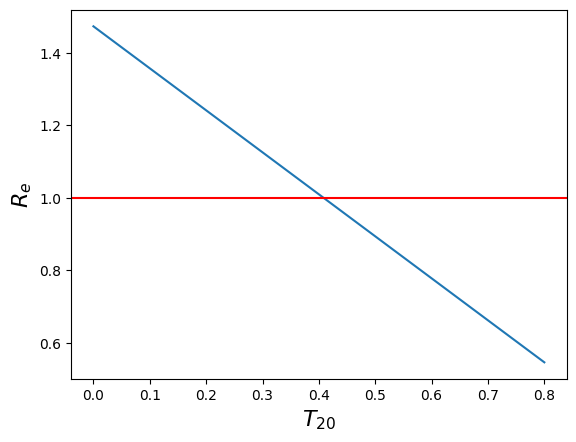

In [4]:
def Ef_Rep(T20):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + (1-eta1)*V1_dfe);
    
    A11 = (1-delta)*T10*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h1 + mu + rho))
    A12 = (eps/(eps + mu))*(((xi-1)*tau*T10 + (1-T10*xi))/(mu + rho + d1))
    
    
    A21 = (1-delta)*T20*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h2 + mu + rho))
    A22 = (eps/(eps + mu))*(((xi-1)*tau*T20 + (1-T20*xi))/(mu + rho + d1))
    
    R_e = C1*(A11 + A12) + C2*(A21 + A22)
    return R_e
    
#F10 = np.linspace(0,0.05,1000)
T20 = np.linspace(0,0.8,1000)
y1 = Ef_Rep(T20)
index_at_Re_equals_1 = np.argmin(np.abs(y1 - 1))
plt.plot(T20, y1)
plt.axhline(y=1,color = 'red')
#plt.axvline(x=F10[index_at_Re_equals_1], color='black', linestyle='--')
#plt.text(F10[index_at_Re_equals_1]+ 0.000012, 1.1, f'F10={F10[index_at_Re_equals_1]:.6f}', color='black', ha='center')
#plt.xlabel(r'$F_{20}$', fontsize =16)
plt.xlabel(r'$T_{20}$', fontsize =16)
plt.ylabel(r'$R_e$',fontsize =16)
#plt.savefig('ThresholdF10.pdf',dpi=600, bbox_inches='tight')


In [5]:
def Ef_Rep_function(T10,T20):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + (1-eta1)*V1_dfe);
    
    A11 = (1-delta)*T10*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h1 + mu + rho))
    A12 = (eps/(eps + mu))*(((xi-1)*tau*T10 + (1-T10*xi))/(mu + rho + d1))
    
    
    A21 = (1-delta)*T20*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h2 + mu + rho))
    A22 = (eps/(eps + mu))*(((xi-1)*tau*T20 + (1-T20*xi))/(mu + rho + d1))
    
    R_e = C1*(A11 + A12) + C2*(A21 + A22)
    return R_e

Ef_Rep_function(0.2,0.2)

1.2416765498874123

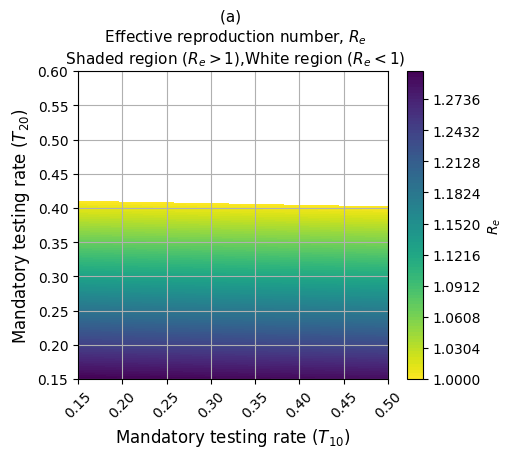

In [6]:

# Fmax = 0.027; F10 = 0.0023; F20 = 0.002;
# Tmax = 0.8; 

def Ef_Rep_function(T10,T20):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + (1-eta1)*V1_dfe);
    
    A11 = (1-delta)*T10*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h1 + mu + rho))
    A12 = (eps/(eps + mu))*(((xi-1)*tau*T10 + (1-T10*xi))/(mu + rho + d1))
    
    
    A21 = (1-delta)*T20*(eps/(eps + mu))*(((1-tau)*xi + tau)/(h2 + mu + rho))
    A22 = (eps/(eps + mu))*(((xi-1)*tau*T20 + (1-T20*xi))/(mu + rho + d1))
    
    R_e = C1*(A11 + A12) + C2*(A21 + A22)
    return R_e

# def Basic_Rep_function(beta1):    
#     return (beta1*eps*((tau1+tau2)*(mu+rho) +(1-tau1)*psi1*(mu+rho+d1)))/((eps+mu)*(mu+rho)*(mu+rho+d1))
   
threshold = 1
# F10 = np.linspace(0, 0.027, 1000)
# F20 = np.linspace(0, 0.027, 1000)
T10 = np.linspace(0.15, 0.5, 1000)
T20 = np.linspace(0.15, 0.6, 1000)
#beta2 = np.linspace(0, 2, 1000)
# beta1 = np.linspace(0,8,1000)
#F20 = np.linspace(0, 0.0003, 1000)
x1,y1 = np.meshgrid(T10, T20)
#x1,y1 = np.meshgrid(F10, F20)

    
z1 = Ef_Rep_function(x1,y1)

fig, axs = plt.subplots(figsize =(5,4))


#contour_levels = np.linspace(z1.min(), threshold, 20)
contour_levels = np.linspace(threshold, z1.max(), 100)
#contour_levels = np.sort(contour_levels)
#contour = axs.contourf(x1, y1, z1, levels=[threshold, z1.max()], cmap='viridis', alpha=0.3)
contour = axs.contourf(x1, y1, z1, cmap='viridis_r', levels=contour_levels) # offset=z1.min(),cmap='viridis', alpha=0.3
# axs[1].contourf(x2, y2, z2, levels=[threshold, z2.max()], cmap='rainbow', alpha=0.3)
# axs[2].contourf(x3, y3, z3, levels=[threshold, z3.max()], cmap='rainbow', alpha=0.3)

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x1, y1, z1, cmap='viridis', edgecolor='k')
# contour = ax.contourf(x1, y1, z1, levels=[threshold, z1.max()], zdir='z1', offset=z1.min(), cmap='rainbow', alpha=0.3)

# Add labels and title
# axs.set_xlabel(r'First transmission rate ($\beta_{1}$)')
#axs.set_xlabel(r'Second transmission rate ($\beta_{2}$)')
axs.set_xlabel(r'Mandatory testing rate ($T_{10}$)', fontsize=12)
axs.set_ylabel(r'Mandatory testing rate ($T_{20}$)',fontsize=12)
#axs.set_ylim([0.38, 0.42])
# axs.set_xlabel(r'Mandatory Testing rate in primary dyn. ($T_{10}$)',fontsize=12)
# axs.set_ylabel(r'Mandatory Testing rate in Secondary dyn. ($T_{20}$)',fontsize=12)
#axs.xaxis.set_major_formatter('${:.0e}$'.format)
#axs.yaxis.set_major_formatter('${:.1e}$'.format)
plt.title('(a) \n Effective reproduction number, $R_e$\n Shaded region ($R_e >1$),White region ($R_e <1$)', loc='center',fontsize=11)
#plt.title('Effective reproduction number $R_e$:\n Shaded region ($R_e <1$)', loc='center')
fig.colorbar(contour, label=r'$R_e$')
plt.grid(True)
plt.tick_params(axis='x', rotation=45)
plt.savefig('Region_stability_T10_T20_revised2.pdf',dpi=600, bbox_inches='tight')
#plt.savefig("Fig2_region_stability.eps", format='eps', dpi=400)
plt.show()